<a href="https://colab.research.google.com/github/aksha1234/selenium-youtube-scrapper/blob/main/code_04_XX_Iris_Deep_Learning_Classification_with_penguin_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Example - Iris 

This examples demonstrates the core deep learning model building concepts using the Keras library. The Iris flower dataset is used to build the model and perform classification tasks

### 5.1 Setup

In [140]:
#Install related libraries for the course. 
#This is a common requirement for all other exampels too

!pip install pandas
!pip install tensorflow
!pip install sklearn
!pip install matplotlib

### 4.2. Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets


In [142]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import keras


In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
encoder=LabelEncoder().fit(df['species'])

In [ ]:
encoder.classes_

In [ ]:
encoder.transform(df.species)

In [ ]:
df['species']=encoder.transform(df.species)

In [ ]:
df

In [ ]:
## To convert the dataframe into the arrays
## convert into the five array of size by 5
df_numpy=df.to_numpy() 

In [ ]:
train_inputs=df_numpy[:,:4]

In [ ]:
train_targets=df_numpy[:,4]

> Standardised teh data with the normal distribution having the 0 as means and 1 as variance ~N(0,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler().fit(train_inputs)

In [ ]:
train_inputs=scaler.transform(train_inputs)

In [ ]:
tf.keras.utils.to_categorical(train_targets);

In [ ]:
train_targets=tf.keras.utils.to_categorical(train_targets)

In [ ]:
print("\nFeatures after scaling :\n------------------------------------")
print(train_inputs[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(train_targets[:5,:])

In [ ]:
#Split training and test data
from sklearn.model_selection import train_test_split

In [ ]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(train_inputs,train_targets,test_size=0.1,random_state=12)

### 4.3. Creating a Model

Creating a model in Keras requires defining the following

1. Number of hidden layers
2. Number of nodes in each layer
3. Activation functions
4. Loss Function & Accuracy measurements

In [ ]:
from tensorflow import keras

In [ ]:
#Number of classes in the target variable
NB_CLASSES=3

In [ ]:
## Create a sequential model in Keras
model=tf.keras.models.Sequential()

In [ ]:
## Add the first hidden layer
model.add(keras.layers.Dense(128,    ## Number of nodes
                             input_shape=(4,),  ### Number of input variables
                             name='Hiddden_layer-1', ## Logical NAme
                             activation='relu'))   ## Activation function

> Adding the second hidden layer with 128 nodes aand no need to **make input size one more time.**

In [ ]:
model.add(keras.layers.Dense(128,name='Hidden-Layer-2',activation='relu'))

> Creating the output layers

In [ ]:
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax')) ## As we have multiclass variables

In [ ]:
## compile the model with loss and metrics
model.compile(loss='categorical_crossentropy',metrics=['accuracy','MSE'])

In [ ]:
model.summary()

### 4.4. Training and evaluating the Model

Training the model involves defining various training models and then perform 
forward and back propagation.

In [ ]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16 ## 2^n only multiples
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

In [ ]:

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 

In [ ]:
history=model.fit(train_inputs,train_targets,batch_size=BATCH_SIZE,epochs=EPOCHS,verbose=VERBOSE,validation_split=VALIDATION_SPLIT,workers=-1)

In [ ]:
## TO covert this data into dataframe we need history.hsitory
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [ ]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(test_inputs,test_targets)

### 4.5. Saving and Loading Models

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction

In [ ]:
#Saving a model
    
model.save("iris_save")
    
#Loading a Model 
loaded_model = keras.models.load_model("iris_save")

In [ ]:

#Print Model Summary
loaded_model.summary()

### 4.6. Predictions with Deep Learning Models

In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

In [ ]:
#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

In [ ]:
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)


In [ ]:
#Find prediction
prediction = np.argmax(raw_prediction)## numpy is having teh argument maximum
print("Prediction is ", encoder.inverse_transform([prediction]))

In [143]:
df=sns.load_dataset('penguins')

In [144]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Preprocessing of teh dataset

In [145]:
## Lest see how juch data is present or not
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [146]:
## We will be having our target as species and inpu variables remaining ones
targets_df=df['species'].copy()

In [147]:
## With the help of imputer we will rplace the missing values
from sklearn.impute import SimpleImputer

In [148]:
input_cols=df.columns.tolist()[1:]

In [149]:
input_cols

['island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [150]:
## Just remove the null values form the dtata
df.dropna(inplace=True)

In [151]:
categorical_cols=df.drop('species',axis=1).select_dtypes(include='object').columns.tolist()
numerical_cols=df.select_dtypes(include=np.number).columns.tolist()

In [152]:
target_cols=df.columns[0]

In [153]:
target_cols

'species'

In [154]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [155]:
### Just starting the standardizing the numerial columns
from sklearn.preprocessing import StandardScaler


In [156]:
df[numerical_cols]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [157]:
scaler=StandardScaler().fit(df[numerical_cols])

In [158]:
df[numerical_cols]=scaler.transform(df[numerical_cols])

In [159]:
## Now encoding the categorcal columns
from sklearn.preprocessing import OneHotEncoder


In [160]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(df[categorical_cols])

In [161]:
encoded_cols=encoder.get_feature_names(categorical_cols).tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [162]:
encoded_cols

['island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_Female', 'sex_Male']

In [163]:
df[encoded_cols]=encoder.transform(df[categorical_cols])

In [164]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male,0.0,0.0,1.0,0.0,1.0
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female,0.0,0.0,1.0,1.0,0.0
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female,0.0,0.0,1.0,1.0,0.0
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female,0.0,0.0,1.0,1.0,0.0
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female,1.0,0.0,0.0,1.0,0.0
340,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female,1.0,0.0,0.0,1.0,0.0
341,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male,1.0,0.0,0.0,0.0,1.0
342,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female,1.0,0.0,0.0,1.0,0.0


In [165]:
inputs_df=df[numerical_cols+encoded_cols].copy().to_numpy() ## converting the dtaaframe into 
targets_df=df[target_cols].copy()

In [167]:
## COnverting teh target column in to label encoder
encoder2=LabelEncoder().fit(targets_df)

In [168]:
targets_df=encoder2.transform(targets_df)

In [169]:
encoder2.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [195]:
## With the help of keras we will convert it into catgories into matrces of 3 columns as 3 classes avaliable
targets_df=tf.keras.utils.to_categorical(targets_df)

In [196]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(inputs_df,targets_df,test_size=0.1,random_state=0)

In [197]:
## Designing the models
model=tf.keras.models.Sequential()

In [198]:
train_inputs.shape

(299, 9)

In [199]:
model.add(keras.layers.Dense(128,activation='relu',input_shape=(9,),name='Hidden_Layer1'))

In [200]:
model.add(keras.layers.Dense(128,activation='relu',name='Hidden_Layer2'))

In [201]:
model.add(keras.layers.Dense(128,activation='relu',name='Hidden_Layer3'))

In [202]:
model.add(keras.layers.Dense(3,activation='softmax',name='Output_layer'))

In [203]:
## compile the model with loss and metrics
model.compile(loss='categorical_crossentropy',## Because model is multi classs
              metrics=['accuracy','mse'])

In [204]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer1 (Dense)       (None, 128)               1280      
                                                                 
 Hidden_Layer2 (Dense)       (None, 128)               16512     
                                                                 
 Hidden_Layer3 (Dense)       (None, 128)               16512     
                                                                 
 Output_layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 34,691
Trainable params: 34,691
Non-trainable params: 0
_________________________________________________________________


## Training and evaluating the model

In [205]:
train_targets

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0

In [206]:
history=model.fit(train_inputs,train_targets,verbose=1,batch_size=16,epochs=16,validation_split=0.2,workers=-1)

Epoch 1/16
15/15 [==============================] - 1s 19ms/step - loss: 0.4161 - accuracy: 0.9038 - mse: 0.0699 - val_loss: 0.1081 - val_accuracy: 1.0000 - val_mse: 0.0095
Epoch 2/16
15/15 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9958 - mse: 0.0049 - val_loss: 0.0303 - val_accuracy: 1.0000 - val_mse: 0.0023
Epoch 3/16
15/15 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 1.0000 - mse: 0.0014 - val_loss: 0.0195 - val_accuracy: 1.0000 - val_mse: 0.0022
Epoch 4/16
15/15 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 1.0000 - mse: 6.4710e-04 - val_loss: 0.0556 - val_accuracy: 0.9667 - val_mse: 0.0135
Epoch 5/16
15/15 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9958 - mse: 0.0015 - val_loss: 0.0328 - val_accuracy: 0.9833 - val_mse: 0.0080
Epoch 6/16
15/15 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9958 - mse: 0.0014 - val_loss: 0.0388 - va

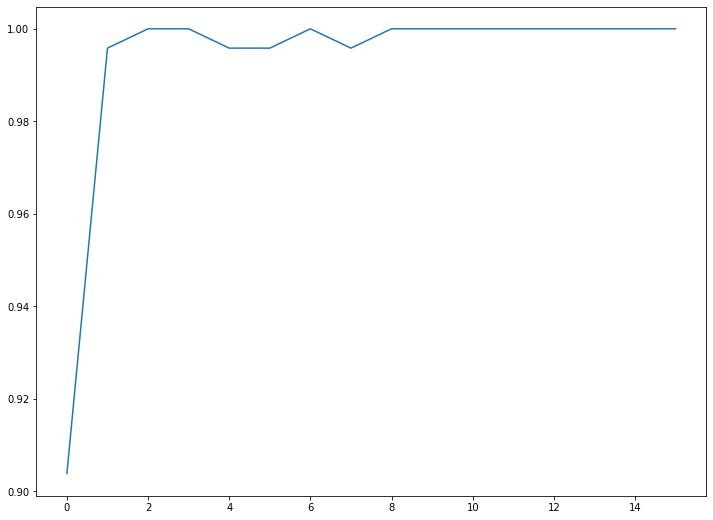

In [208]:
pd.DataFrame(history.history)['accuracy'].plot(figsize=(12,9))

In [211]:
model.evaluate(test_inputs,test_targets)

2/2 [==============================] - 0s 6ms/step - loss: 0.0116 - accuracy: 1.0000 - mse: 0.0021    


[0.01162902731448412, 1.0, 0.0020867965649813414]

In [225]:
## NOw lets predict for the value if we have
input=[[1,1,1,0.8,0.5,1,1,1,1]]

In [226]:
model.predict(input)

array([[0.00140887, 0.30120972, 0.6973814 ]], dtype=float32)

In [227]:
prediction=np.argmax(model.predict(input))

In [228]:
encoder2.inverse_transform([prediction])

array(['Gentoo'], dtype=object)

In [224]:
encoder2.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [229]:
predict_test=model.predict(test_inputs)

In [238]:
prediction_2=[]
for i in predict_test:
  prediction_2.append(np.argmax(i)) 

In [247]:
y_pred=encoder2.inverse_transform(prediction_2)

In [248]:
y_true=[]
for i in test_targets:
  y_true.append(np.argmax(i))


In [249]:
y_true=encoder2.inverse_transform(y_true)

In [250]:
accuracy_score(y_true,y_true)

1.0